In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

# Generate some fake data

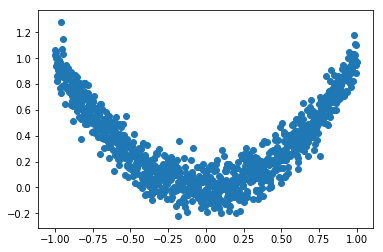

In [3]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

# Load dataset into a torch dataset

In [4]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [5]:
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

# Default Model

In [6]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

# Different Networks

In [7]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
net_Adadelta    = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam, net_Adadelta]

# Different Optimizers

In [8]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
opt_Adadelta    = torch.optim.Adadelta(net_Adadelta.parameters(), lr=LR)#, rho=0.9, eps=1e-04, weight_decay=0.001)
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam, opt_Adadelta]

In [9]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], [], []]   # record loss

# Training

In [10]:
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)                 # Get output for every net
            loss = loss_func(output, b_y)     # compute loss for every net
            opt.zero_grad()                   # Clear gradients for next train
            loss.backward()                   # backpropagation, compute gradients 
            opt.step()                        # apply gradients
            l_his.append(loss.data[0])        # loss recoder
            

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


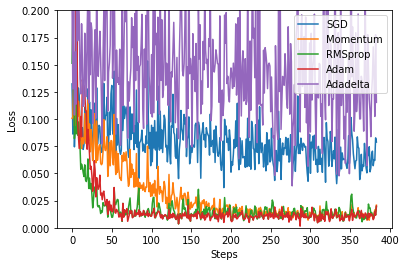

In [11]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam', 'Adadelta']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
    
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim(0, 0.2)
plt.show()

In [13]:
%load_ext version_information
%version_information torch, numpy, matplotlib

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
torch 0.3.0.post4
numpy 1.14.0
matplotlib 2.1.2
Sun Feb 11 19:28:17 2018 CST